In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style


%matplotlib inline

In [58]:
# These are the styles available

style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

### Sample Data

In [59]:
reviews_pd_df = pd.read_csv("sample-data/employee_reviews_usa.csv", index_col=0)

In [60]:
reviews_pd_df['job_title'] = reviews_pd_df['job_title'].str.lower()
reviews_pd_df['current_employee'] = 1 * reviews_pd_df['job_title'].str.contains('current')

### Regular Bar chart

When there is one numerical variable, other categorical variable

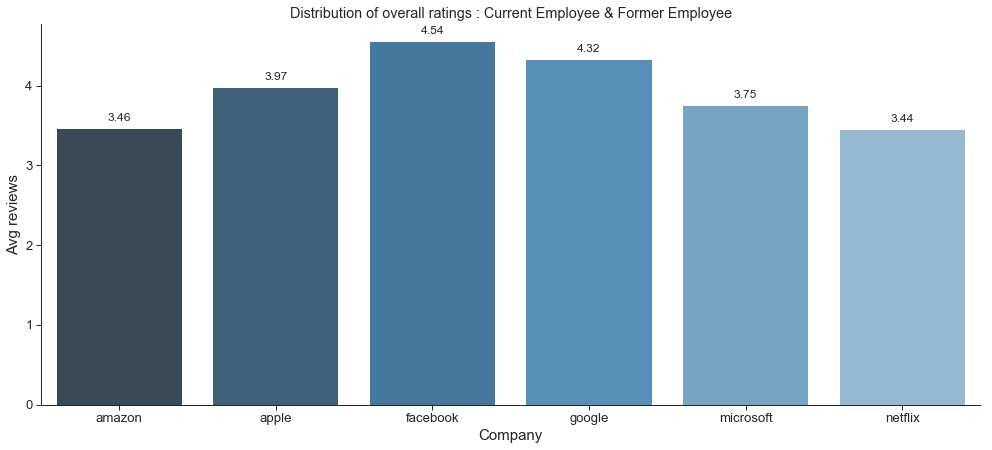

In [61]:
viz_df = reviews_pd_df[['company','overall_ratings']].groupby(['company']).mean().reset_index()

## Styling 
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
sns.set_context("paper", font_scale=1.5, rc={"font.size":10,"axes.labelsize":15})

ax = sns.barplot(x='company',y='overall_ratings'
                 , data = viz_df , palette = 'Blues_d') # Change this palette 
ax.set_ylabel('Avg reviews')
ax.set_xlabel('Company')
ax.set_title('Distribution of overall ratings : Current Employee & Former Employee')

    
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/2., height + 0.1, 
           '{:1.2f}'.format(100 * height / 100),
           ha = 'center' ,fontsize = 12)


sns.despine()


### Two bar bar chart

When there are two categorical variables, other numerical variable. 

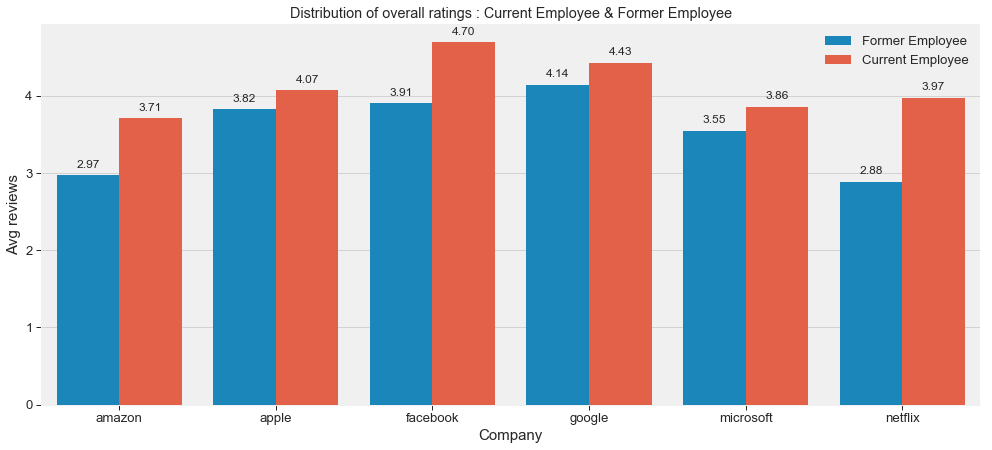

In [62]:
viz_df = reviews_pd_df[['company','current_employee','overall_ratings']].groupby(['company','current_employee']).mean().reset_index()

## Styling 
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')
sns.set_context("paper", font_scale=1.5, rc={"font.size":10,"axes.labelsize":15})

ax = sns.barplot(x='company',y='overall_ratings'
                 , data = viz_df , hue = 'current_employee')
ax.set_ylabel('Avg reviews')
ax.set_xlabel('Company')
ax.set_title('Distribution of overall ratings : Current Employee & Former Employee')
for t, l in zip(ax.get_legend().texts, ['Former Employee','Current Employee']): t.set_text(l)
ax.get_legend().set_title('')
    
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/2., height + 0.1, 
           '{:1.2f}'.format(100 * height / 100),
           ha = 'center' ,fontsize = 12)


sns.despine()


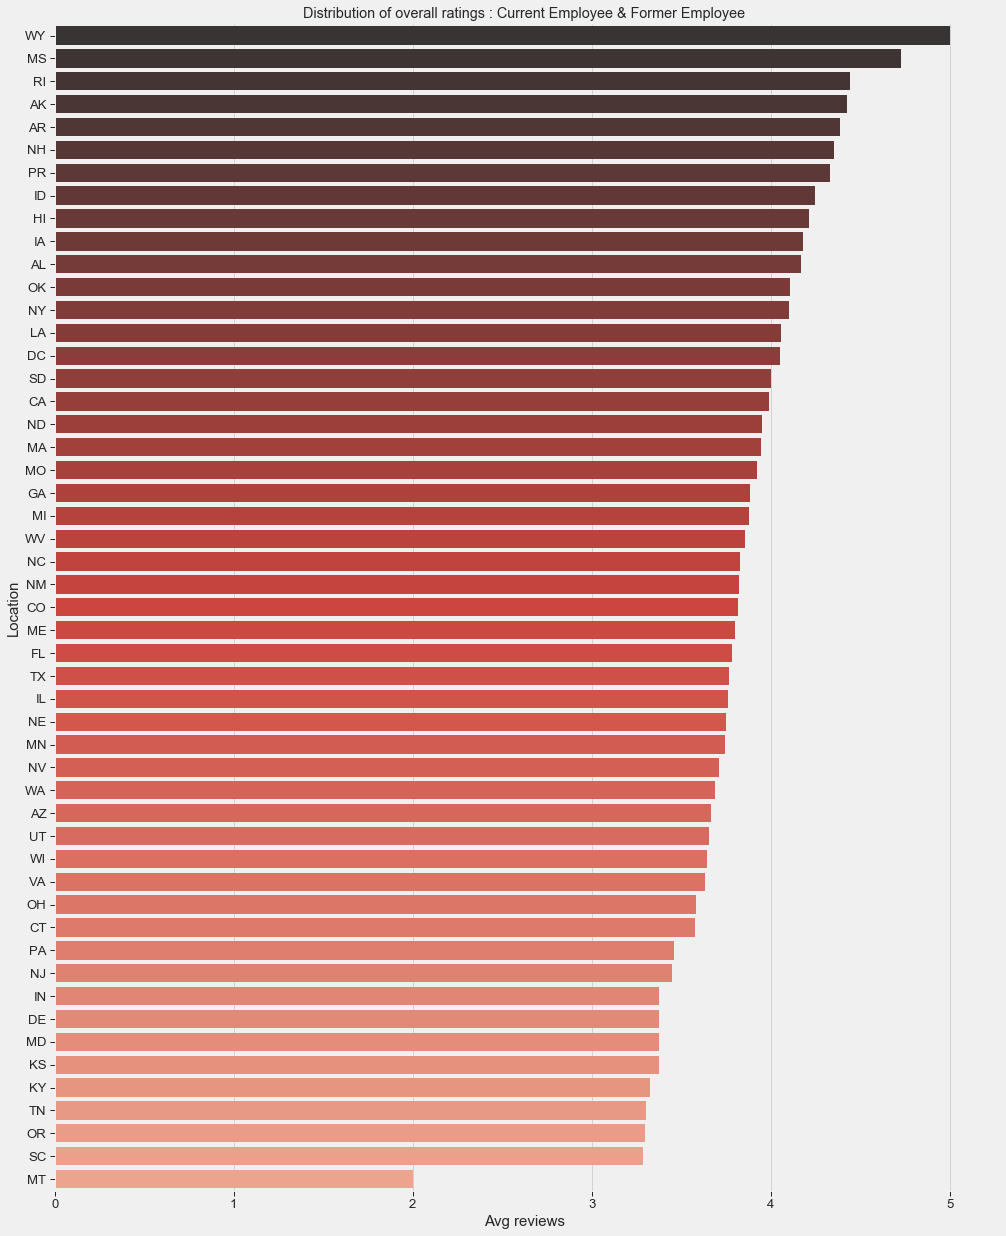

In [97]:
def split(location):
    return location.split(',')[1].strip()

viz_df = reviews_pd_df.copy()
viz_df['location'] = viz_df['location'].apply(split)
viz_df = viz_df[['location','overall_ratings']].groupby(['location']).mean().reset_index()
viz_df = viz_df[(viz_df['location'].apply(len)) == 2]
viz_df = viz_df.sort_values(by= 'overall_ratings', ascending=False)
## Styling 
plt.figure(figsize = (15, 20))
plt.style.use('fivethirtyeight')
sns.set_context("paper", font_scale=1.5, rc={"font.size":10,"axes.labelsize":15})

ax = sns.barplot(y='location',x='overall_ratings', data = viz_df, palette='Reds_d' )
ax.set_xlabel('Avg reviews')
ax.set_ylabel('Location')
ax.set_title('Distribution of overall ratings : Current Employee & Former Employee')

sns.despine()

### Questions

1. How do we switch colors from red being current to red former??
2. Add logos instead of text in the x axis